In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score
sns.set()
print(tf.__version__)

2.0.0


In [2]:
# Load dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("X Train Shape {} and Y Train Shape {}".format(X_train.shape,y_train.shape))
print("X Test Shape {} and Y Test Shape {}".format(X_test.shape,y_test.shape))

X Train Shape (60000, 28, 28) and Y Train Shape (60000,)
X Test Shape (10000, 28, 28) and Y Test Shape (10000,)


In [4]:
# scaling feature input space
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
# model building
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

# model compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
# train the model
hist = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.5185 - accuracy: 0.8589 - val_loss: 0.3188 - val_accuracy: 0.9131
Epoch 2/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3557 - accuracy: 0.8989 - val_loss: 0.2966 - val_accuracy: 0.9171
Epoch 3/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3364 - accuracy: 0.9045 - val_loss: 0.2848 - val_accuracy: 0.9213
Epoch 4/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3284 - accuracy: 0.9054 - val_loss: 0.2765 - val_accuracy: 0.9237
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3237 - accuracy: 0.9067 - val_loss: 0.2728 - val_accuracy: 0.9249
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3201 - accuracy: 0.9088 - val_loss: 0.2728 - val_accuracy: 0.9236
Epoch 7/10
60000/60000 [==============================]

In [7]:
# Check accuracy on test dataset
predict = model.predict(X_test).argmax(axis=1)
print('Test Accuracy {}'.format(accuracy_score(y_test,predict)))
print('Test F1 Score {}'.format(f1_score(y_test,predict,average='weighted'))) 

Test Accuracy 0.9235
Test F1 Score 0.9232032104416464


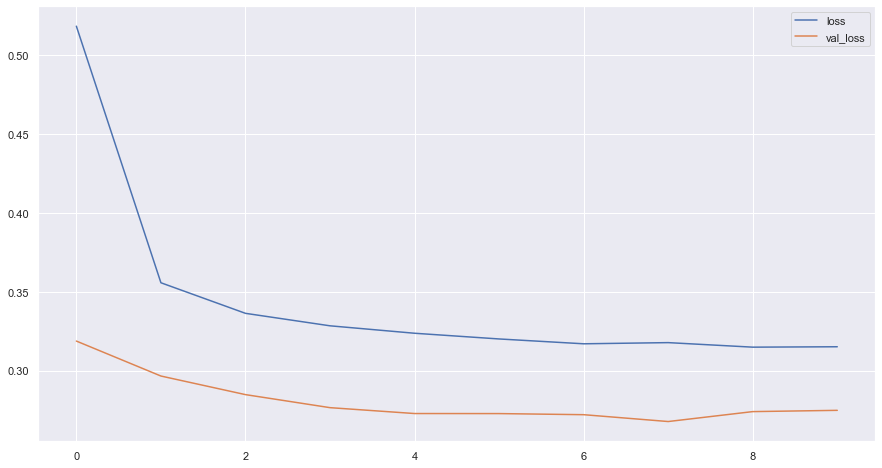

In [8]:
# plot loss 
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

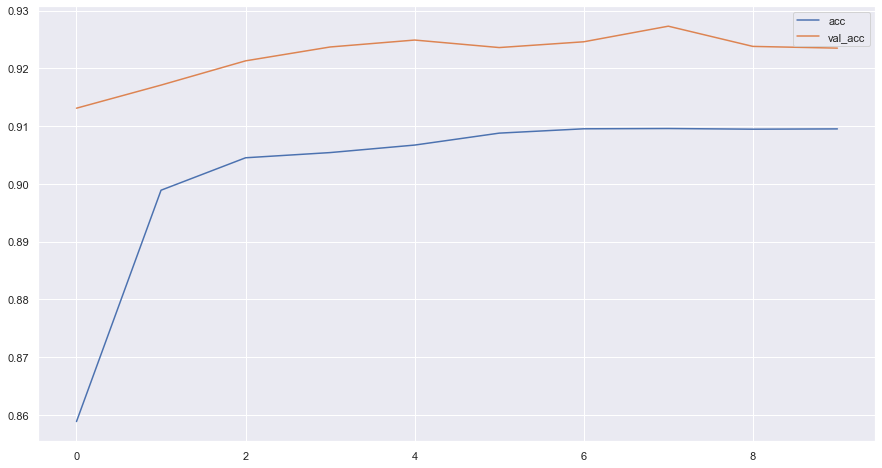

In [9]:
# Plot  accuracy 
plt.figure(figsize=(15,8))
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

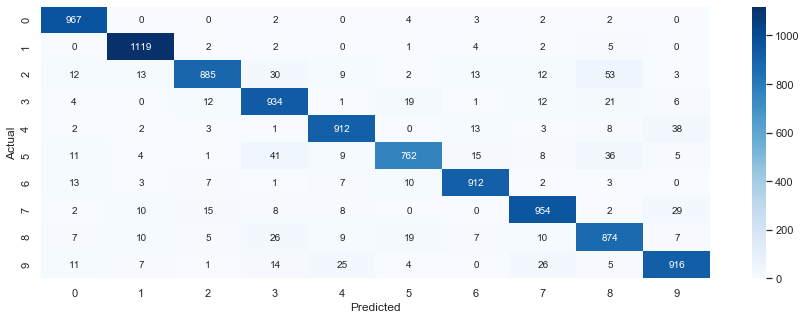

In [10]:
# confusion matrix
confusion = pd.DataFrame({'Actual':y_test,'Predicted':predict})
confusion_mat = confusion.groupby(['Actual','Predicted']).size().unstack(fill_value=0)
plt.figure(figsize=(15,5))
sns.heatmap(confusion_mat,annot=True,fmt='g',cmap='Blues')

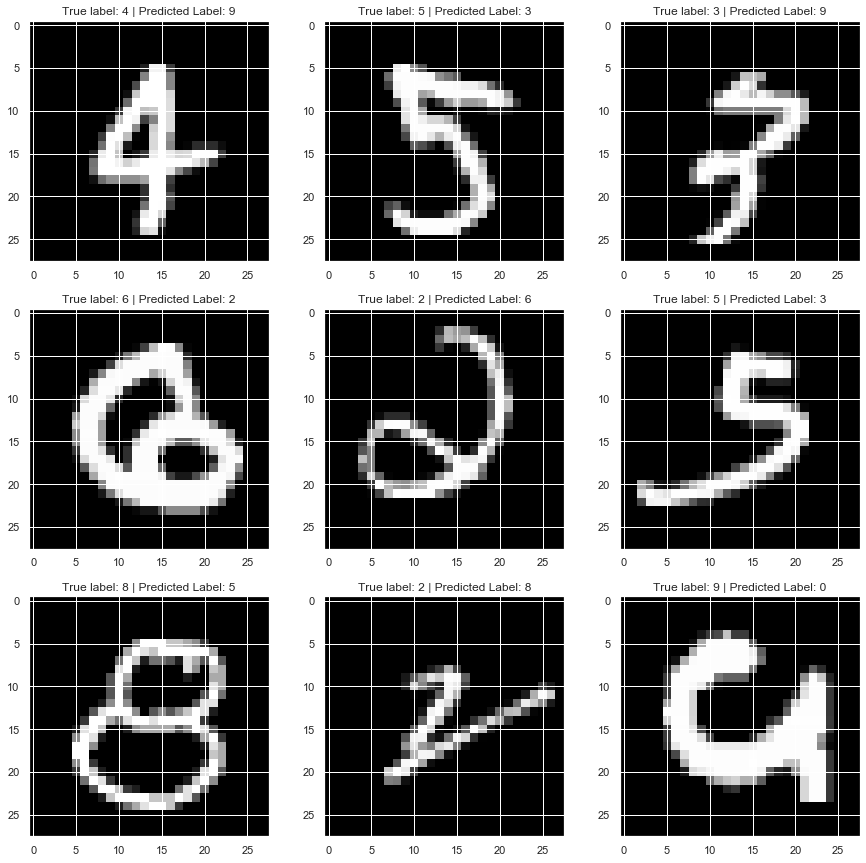

In [11]:
# index of Sample images where predictions are wrong
all_idx = np.where(y_test != predict)[0]
sample_idx = np.random.choice(all_idx,9)

# plot sample images
fig, axs = plt.subplots(3, 3,figsize=(15, 15))

# start idx
pos = 0
for row in range(3):
    for col in range(3):
        img_idx = sample_idx[pos]
        axs[row, col].imshow(X_test[img_idx], cmap='gray')
        axs[row,col].set_title("True label: {} | Predicted Label: {}".format(y_test[img_idx], predict[img_idx])) 
        pos = pos + 1

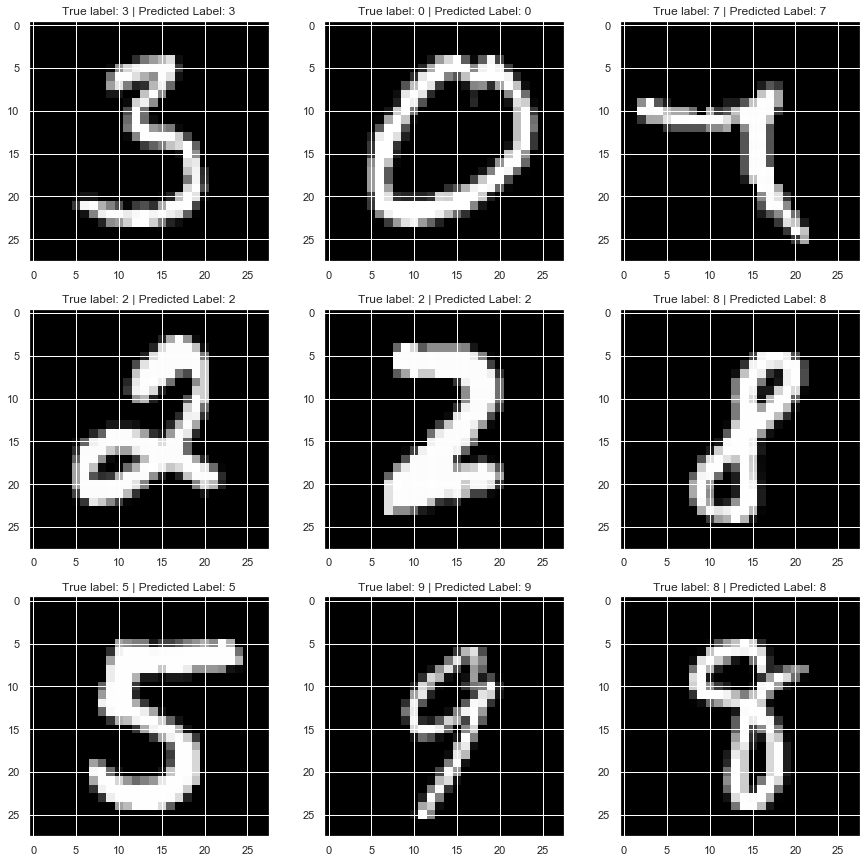

In [12]:
# index of Sample images where predictions are correct
all_idx = np.where(y_test == predict)[0]
sample_idx = np.random.choice(all_idx,9)

# plot sample images
fig, axs = plt.subplots(3, 3,figsize=(15, 15))

# start idx
pos = 0
for row in range(3):
    for col in range(3):
        img_idx = sample_idx[pos]
        axs[row, col].imshow(X_test[img_idx], cmap='gray')
        axs[row,col].set_title("True label: {} | Predicted Label: {}".format(y_test[img_idx], predict[img_idx])) 
        pos = pos + 1